In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
#dataset=['ETTh1','ETTh2','ETTm1','ETTm2','electricity','weather','traffic','illness','exchange_rate']

In [91]:
# 读取.npy文件 ETTh1
dir = 'result/dataset_ETTh2'

In [93]:
#ETTm1
dir = 'result/dataset_ETTm1'

In [95]:
#Electricity
dir = 'result/dataset_electricity'

In [108]:
#weather
dir = 'result/dataset_weather'

In [157]:
#traffic
dir = 'result/dataset_traffic'

In [110]:
#illness
dir = 'result/dataset_illness'

In [112]:
#exchange_rate
dir = 'result/dataset_exchange_rate'

0.38274643283623916


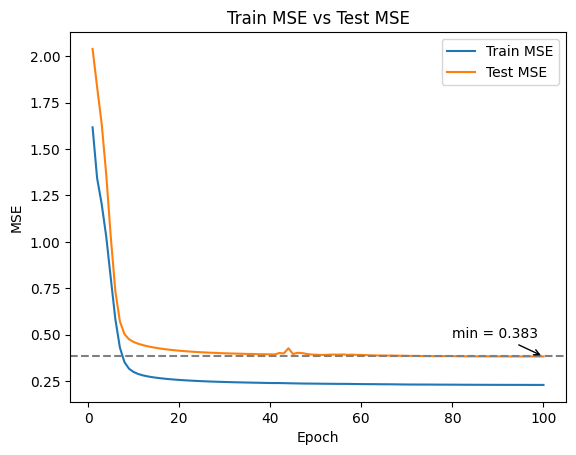

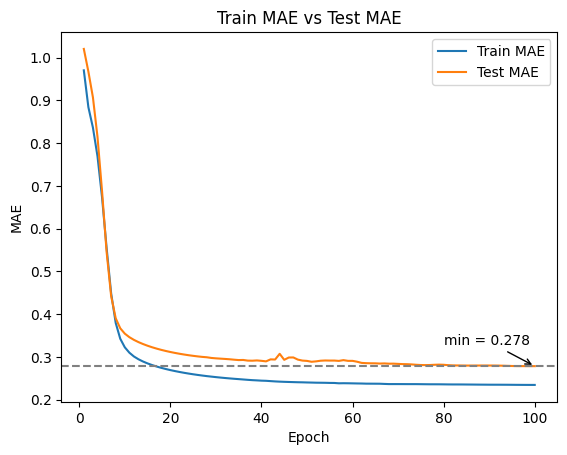

In [158]:
# 画图
datadir = os.path.join(dir,'training_stats.npy')
data = np.load(datadir,allow_pickle=True).item()

############################## MSE ##################################
# 找出最小点的位置和值
min_index = np.argmin(data['test_mse'])
min_x, min_y = data['epoch'][min_index], data['test_mse'][min_index]
print(min_y)
plt.plot(data['epoch'], data['train_mse'], label='Train MSE')
plt.plot(data['epoch'], data['test_mse'], label='Test MSE')
# 在最小点上添加标注
plt.annotate('min = {:.3f}'.format(min_y), xy=(min_x, min_y), xytext=(min_x-20, min_y+0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),fontsize=10)
plt.axhline(y=min_y, color='gray', linestyle='--')
plt.title('Train MSE vs Test MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig(os.path.join(dir,'MSE.jpg'))
plt.show()

############################# MAE ###################################
plt.figure
min_index = np.argmin(data['test_mse'])#use min_MSE index
min_x, min_y = data['epoch'][min_index], data['test_mae'][min_index]

plt.plot(data['epoch'], data['train_mae'], label='Train MAE')
plt.plot(data['epoch'], data['test_mae'], label='Test MAE')

plt.annotate('min = {:.3f}'.format(min_y), xy=(min_x, min_y),xytext=(min_x-20, min_y+0.05),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),fontsize=10)
plt.axhline(y=min_y, color='gray', linestyle='--')
plt.title('Train MAE vs Test MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.savefig(os.path.join(dir,'MAE.jpg'))
plt.show()

In [179]:
result=pd.read_csv('result/result.csv')
result

,Dataset,Lookback,MSE,MAE
0,ETTh1,720,0.460,0.469
1,traffic,720,0.383,0.278
2,electricity,720,0.150,0.252
3,illness,54,1.152,0.648
4,exchange,720,0.248,0.369
5,weather,720,0.193,0.253
6,ETTh2,720,0.416,0.451
7,ETTm1,720,0.364,0.406
8,ETTm2,720,0.313,0.387


#Data Visualisation

In [ ]:
# global variables
basedir = '/root/data1/ym/google_tide/TiDE'
datadir = './data/ETDataset/ETT-small'
import pandas as pd
import os

# enter the basedir
os.chdir(basedir)
# open the ETTh1.csv file
df = pd.read_csv(os.path.join(datadir, 'ETTh1.csv'))
df

In [ ]:
dates = [d.split() for d in df['date']]
dates[0:5]

In [ ]:
import matplotlib.pyplot as plt

# convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# visualize the OT column of the dataframe
plt.figure(figsize=(10, 5))  # set the figure size
plt.plot(df['OT'], linestyle='-', color='b', label='oil temperature')  # use only date information and add label
plt.xlabel('Date')  # add x-axis label
plt.ylabel('OT')  # add y-axis label
plt.title('OT Visualization')  # add plot title
plt.legend()  # add legend

# show the plot
plt.show()

In [167]:
import os
import numpy as np
import pandas as pd
import json

results = pd.DataFrame(columns=['Dataset', 'Lookback','MSE', 'MAE'])
# 遍历 result 文件夹下的所有文件和文件夹
for root, dirs, files in os.walk('result/'):
    for filename in files:
        if 'training_stats.npy' in filename:
            filepath = os.path.join(root, filename)
            # 获取数据集名称，例如 "dataset_ETTm1"
            dataset_name = filepath.split('/')[-2]
            name = dataset_name.split("_")[1]
            # 使用 np.load 加载数据
            data = np.load(filepath, allow_pickle=True).item()
            test_mse = data['test_mse']
            test_mae = data['test_mae']
            
            # 查找 test_mse 中的最小值以及对应 index 下的 test_mae
            min_mse = min(test_mse)
            min_mse_index = test_mse.index(min_mse)
            min_mae = test_mae[min_mse_index]
            # 将结果保留 3 位小数
            min_mse = f"{round(min_mse, 3):.{3}f}"
            min_mae = f"{round(min_mae, 3):.{3}f}"
            # 从 args.json 文件中获取 LookBack_len
            args_filepath = os.path.join(root, 'args.json')
            with open(args_filepath, 'r') as f:
                args = json.load(f)
            lookback_len = args.get('lookback_len', 'N/A')
            

            # 将结果添加到 dataframe 中
            df = pd.DataFrame({'Dataset': [name],
                               'Lookback': [lookback_len],
                               'MSE': [min_mse],
                               'MAE': [min_mae]})
            results = pd.concat([results, df])
            
results.to_csv('result/result.csv', index=False)
results

,Dataset,Lookback,MSE,MAE
0,ETTh1,720,0.460,0.469
0,traffic,720,0.383,0.278
0,electricity,720,0.150,0.252
0,illness,54,1.152,0.648
0,exchange,720,0.248,0.369
0,weather,720,0.193,0.253
0,ETTh2,720,0.416,0.451
0,ETTm1,720,0.364,0.406
0,ETTm2,720,0.313,0.387
